In [437]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sqlalchemy import create_engine, text
import json
from dotenv import load_dotenv
import os
load_dotenv()

True

In [438]:
database_url = os.getenv("DATABASE_URL")
engine = create_engine(database_url)

In [439]:
pd.set_option('display.max_columns', None)

In [440]:
df_cars_data = pd.DataFrame()

try:
    with engine.connect():
        print("CONNECTED TO POSTGRESQL DATABASE")
        query = text('SELECT * FROM public."Cars_model_data"')
        df = pd.read_sql_query(query, engine)
        df_cars_data = pd.concat([df_cars_data, df], ignore_index=True)
except Exception as e:
    print(f"Error: {e}")
    print("READING CSV DATA")
    df = pd.read_parquet('./CSV/Cars_model_data.parquet')
    df_cars_data = pd.concat([df_cars_data, df], ignore_index=True)

df_cars_data.head()

CONNECTED TO POSTGRESQL DATABASE


,Combustible,Cilindrada,Potencia,Torque,Alimentación,Cilindros,Válvulas,Sistema start/stop,Aceleración (0-100 km/h),Consumo en ciudad,Consumo en ruta,Consumo mixto,Velocidad máxima,Motor-tracción,Transmisión,Neumáticos,Frenos,Suspensión delantera,Suspensión trasera,Largo,Ancho sin espejos,Ancho con espejos,Alto,Distancia entre ejes,Baúl,Tanque de combustible,Peso,Capacidad de carga,Altura de piso,Remolque con frenos,Remolque sin frenos,Aire acondicionado,Alarma de luces encendidas,Asientos delanteros,Asientos traseros,Tapizados,Cierre de puertas,Vidrios,Espejos exteriores,Espejo interior,Faros delanteros,Faros antiniebla,Computadora de a bordo,Dirección asistida,Llantas,Techo solar,Volante,Sensores de estacionamiento,Cámara de visión,ABS,Distribución electrónica de frenado,Airbag,Alarma e inmovilizador de motor,Anclaje para asientos infantiles,Cinturones de seguridad,Otros,Tercera luz de stop,Autobloqueo de puertas con velocidad,Control de estabilidad,Control de tracción,Equipo de música,Parlantes,Conexión auxiliar (iPod y Mp3),Conexión USB,Interfaz bluetooth,Sistema de control por voz para dispositivos,Pantalla,MirrorLink,model,price,use_status,year,kms,Limitador de velocidad,Limpialuneta,Apertura de baúl y tapa de combustible,Sistema de navegación,Capacidad de vadeo,Ángulo de ataque,Ángulo de partida,Ángulo ventral,Capacidad de pendiente,Escalonamiento vertical,Inclinación lateral,Control de velocidad crucero,Palanca de cambios,Asistencia en frenada de emergencia,Reproducción de audio vía bluetooth,Recarga inalámbrica del celular,Encendido del motor,Sistema de estacionamiento asistido,Sensor de lluvia,Apple Carplay / Android Auto,Puertas,Encendido automático de balizas,Wi-Fi,Sistema de video,Potencia total sistema híbrido,Torque total sistema híbrido,Tensión nominal,Tipo,Cantidad de celdas,Cantidad de módulos,Luz de freno variable,T.V.,Neumáticos delanteros,Neumáticos traseros,Preinstalación teléfono,potencia_cv,potencia_rpm,torque_nm,torque_rpm
0,nafta,1332.0,12.14,0.03,inyección electrónica multipunto,4.0,8,no,12.8,0.0,0.0,0.0,174.0,delantero - delantera,automática CVT,185/60/R15,discos sólidos - tambor,independiente McPherson con brazos oscilantes ...,semi-independiente con eje torsional con amort...,4364.0,1724.0,1962.0,1508.0,2521.0,525.0,48.0,1155.0,NaN,160.0,N/D,400.0,climatizador,sí,con ajuste manual,abatibles completos,tela,centralizado con comando a distancia,eléctricos - eléctricos,eléctricos,antideslumbrante manual,"con apagado automático, fijos",delanteros,sí,eléctrica progresiva,aleación,no tiene,con ajuste en altura,traseros,trasera,sí,sí,conductor y acompañante,alarma e inmovilizador de motor,sí,"delanteros inerciales, traseros inerciales","asistente para arranque en pendientes, indicad...",sí,sí,sí,sí,AM - FM y CD con lector de Mp3,N/D,sí,sí,sí,sí,táctil de 7'',sí,FIAT Cronos 1.3L Drive Pack Plus CVT,21375000,nuevo,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,99,6000,127,4000
1,nafta,1587.0,14.58,0.04,inyección electrónica multipunto,4.0,16,no,11.0,0.0,0.0,0.0,195.0,delantero - delantera,manual 5 velocidades,195/60/R15,discos ventilados - tambor,independiente tipo McPherson,"traversa deformable, resortes helicoidales, am...",3975.0,1740.0,2000.0,1470.0,2540.0,318.0,55.0,NaN,NaN,NaN,None,NaN,climatizador bizona,sí,"con ajuste en altura solo conductor, con ajust...",abatibles 60/40,tela y cuero,centralizado con comando a distancia,eléctricos - eléctricos,eléctricos,antideslumbrante manual,"con encendido automático, con luces led, fijos",delanteros y traseros,sí,eléctrica progresiva,aleación,panorámico fijo,"con ajuste en altura y profundidad, multifunción",delanteros y traseros,trasera,sí,sí,"conductor y acompañante, de cabeza delanteros ...",alarma e inmovilizador de motor,sí,"delanteros inerciales pirotécnicos, traseros i...",None,sí,sí,None,None,"AM - FM, con lector de Mp

In [441]:
print(f"el dataset cuenta con {df_cars_data.shape[0]} filas y {df_cars_data.shape[1]} columnas")

el dataset cuenta con 720 filas y 112 columnas


In [442]:
print(list(df_cars_data.columns))

['Combustible', 'Cilindrada', 'Potencia', 'Torque', 'Alimentación', 'Cilindros', 'Válvulas', 'Sistema start/stop', 'Aceleración (0-100 km/h)', 'Consumo en ciudad', 'Consumo en ruta', 'Consumo mixto', 'Velocidad máxima', 'Motor-tracción', 'Transmisión', 'Neumáticos', 'Frenos', 'Suspensión delantera', 'Suspensión trasera', 'Largo', 'Ancho sin espejos', 'Ancho con espejos', 'Alto', 'Distancia entre ejes', 'Baúl', 'Tanque de combustible', 'Peso', 'Capacidad de carga', 'Altura de piso', 'Remolque con frenos', 'Remolque sin frenos', 'Aire acondicionado', 'Alarma de luces encendidas', 'Asientos delanteros', 'Asientos traseros', 'Tapizados', 'Cierre de puertas', 'Vidrios', 'Espejos exteriores', 'Espejo interior', 'Faros delanteros', 'Faros antiniebla', 'Computadora de a bordo', 'Dirección asistida', 'Llantas', 'Techo solar', 'Volante', 'Sensores de estacionamiento', 'Cámara de visión', 'ABS', 'Distribución electrónica de frenado', 'Airbag', 'Alarma e inmovilizador de motor', 'Anclaje para asie

In [443]:
df_cars_data.rename(columns={
    'Sistema start / stop': 'Sistema start/stop',
    'Aceleración 0-100 km/h': 'Aceleración (0-100 km/h)',
    'Motor - tracción': 'Motor-tracción',
    'Frenos (del. - tras.)': 'Frenos',
    'Vidrios (del. - tras.)': 'Vidrios',
}, inplace=True)
df_cars_data = df_cars_data.drop([
    'Preinstalación teléfono',
    'Neumáticos delanteros',
    'Neumáticos traseros',
    'Cantidad de celdas',
    'Cantidad de módulos',
    'Luz de freno variable',
    'Encendido automático de balizas', 
    'Sistema de video', 
    'T.V.',
    'Wi-Fi',
    'Sensor de lluvia', 
    'Recarga inalámbrica del celular', 
    'Apple Carplay / Android Auto', 
    'Reproducción de audio vía bluetooth',
    'Sistema de estacionamiento asistido', 
    'Asistencia en frenada de emergencia',
    'Sistema de navegación',
    'Limpialuneta',
    'Equipo de música', 
    'Parlantes', 
    'Conexión auxiliar (iPod y Mp3)', 
    'Conexión USB', 
    'Interfaz bluetooth', 
    'Sistema de control por voz para dispositivos', 
    'Pantalla',
    'Anclaje para asientos infantiles', 
    'Cinturones de seguridad',
    'Volante', 
    'Sensores de estacionamiento', 
    'Cámara de visión', 
    'ABS',
    'Computadora de a bordo',
    'Airbag',
    'Techo solar',
    'Tapizados',
    'Aire acondicionado',
    'Asientos delanteros',
    'Asientos traseros',
    'Espejos exteriores',
    'Espejo interior',
    'Faros delanteros',
    'Faros antiniebla',
    'Apertura de baúl y tapa de combustible',
    'Otros',
    'Tercera luz de stop',
    'Alarma e inmovilizador de motor',
    'Vidrios',
    'Alarma de luces encendidas',
    'Cierre de puertas',
    'Distribución electrónica de frenado',
    'Ángulo de ataque',
    'Ángulo de partida',
    'Ángulo ventral',
    'Capacidad de pendiente',
    'Escalonamiento vertical',
    'Inclinación lateral',
    'Puertas',
    'potencia_cv',
    'potencia_rpm',
    'torque_nm',
    'torque_rpm'  
], axis=1)

In [444]:
df_cars_data.head()

,Combustible,Cilindrada,Potencia,Torque,Alimentación,Cilindros,Válvulas,Sistema start/stop,Aceleración (0-100 km/h),Consumo en ciudad,Consumo en ruta,Consumo mixto,Velocidad máxima,Motor-tracción,Transmisión,Neumáticos,Frenos,Suspensión delantera,Suspensión trasera,Largo,Ancho sin espejos,Ancho con espejos,Alto,Distancia entre ejes,Baúl,Tanque de combustible,Peso,Capacidad de carga,Altura de piso,Remolque con frenos,Remolque sin frenos,Dirección asistida,Llantas,Autobloqueo de puertas con velocidad,Control de estabilidad,Control de tracción,MirrorLink,model,price,use_status,year,kms,Limitador de velocidad,Capacidad de vadeo,Control de velocidad crucero,Palanca de cambios,Encendido del motor,Potencia total sistema híbrido,Torque total sistema híbrido,Tensión nominal,Tipo
0,nafta,1332.0,12.14,0.03,inyección electrónica multipunto,4.0,8,no,12.8,0.0,0.0,0.0,174.0,delantero - delantera,automática CVT,185/60/R15,discos sólidos - tambor,independiente McPherson con brazos oscilantes ...,semi-independiente con eje torsional con amort...,4364.0,1724.0,1962.0,1508.0,2521.0,525.0,48.0,1155.0,NaN,160.0,N/D,400.0,eléctrica progresiva,aleación,sí,sí,sí,sí,FIAT Cronos 1.3L Drive Pack Plus CVT,21375000,nuevo,NaN,NaN,None,None,None,None,None,None,None,None,None
1,nafta,1587.0,14.58,0.04,inyección electrónica multipunto,4.0,16,no,11.0,0.0,0.0,0.0,195.0,delantero - delantera,manual 5 velocidades,195/60/R15,discos ventilados - tambor,independiente tipo McPherson,"traversa deformable, resortes helicoidales, am...",3975.0,1740.0,2000.0,1470.0,2540.0,318.0,55.0,NaN,NaN,NaN,None,NaN,eléctrica progresiva,aleación,sí,None,None,sí,Peugeot 208 Feline 1.6,4500000,usado,2018.0,36000.0,sí,None,None,None,None,None,None,None,None
2,nafta,1332.0,12.14,0.03,inyección electrónica multipunto,4.0,8,no,11.5,0.0,0.0,0.0,174.0,delantero - delantera,manual 5 velocidades,185/60/R15,discos sólidos - tambor,independiente McPherson con brazos oscilantes ...,semi-independiente con eje torsional con amort...,4364.0,1724.0,1962.0,1508.0,2521.0,525.0,48.0,1155.0,NaN,160.0,N/D,400.0,eléctrica progresiva,aleación,sí,sí,sí,sí,FIAT Cronos 1.3L Drive Pack Plus,136000,nuevo,NaN,NaN,None,None,None,None,None,None,None,None,None
3,nafta,1332.0,12.14,0.03,inyección electrónica multipunto,4.0,8,no,11.5,0.0,0.0,0.0,174.0,delantero - delantera,manual 5 velocidades,185/60/R15,discos sólidos - tambor,independiente McPherson con brazos oscilantes ...,semi-independiente con eje torsional con amort...,4364.0,1724.0,1962.0,1508.0,2521.0,525.0,48.0,1155.0,NaN,160.0,N/D,400.0,eléctrica progresiva,aleación,sí,sí,sí,sí,FIAT Cronos 1.3L Drive Pack Plus,150000,nuevo,NaN,NaN,None,None,None,None,None,None,None,None,None
4,nafta,1747.0,15.94,0.05,inyección electrónica multipunto,4.0,16,no,14.0,0.0,0.0,0.0,176.0,delantero - delantera,automática secuencial 6 velocidades,215/65/R16,discos ventilados - tambor,ruedas independientes tipo McPherson con brazo...,"Multi-Link, resortes helicoidales y barra esta...",4945.0,1845.0,2033.0,1735.0,2990.0,937.0,60.0,1688.0,650.0,NaN,N/D,400.0,eléctrica progresiva,aleación,sí,sí,sí,sí,FIAT Toro 1.8 Freedom S-Design 4x2 CD Aut,200000,nuevo,NaN,NaN,None,N/D,sí,"levas de cambios al volante - Paddle Shifters,...",None,None,None,None,None


In [445]:
print(f"el dataset cuenta con {df_cars_data.shape[0]} filas y {df_cars_data.shape[1]} columnas")

el dataset cuenta con 720 filas y 51 columnas


In [446]:
df_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Combustible                           720 non-null    object 
 1   Cilindrada                            715 non-null    float64
 2   Potencia                              720 non-null    float64
 3   Torque                                720 non-null    float64
 4   Alimentación                          720 non-null    object 
 5   Cilindros                             715 non-null    float64
 6   Válvulas                              717 non-null    object 
 7   Sistema start/stop                    660 non-null    object 
 8   Aceleración (0-100 km/h)              464 non-null    float64
 9   Consumo en ciudad                     718 non-null    float64
 10  Consumo en ruta                       720 non-null    float64
 11  Consumo mixto      

In [447]:
df_cars_data.describe()

,Cilindrada,Potencia,Torque,Cilindros,Aceleración (0-100 km/h),Consumo en ciudad,Consumo en ruta,Consumo mixto,Velocidad máxima,Largo,Ancho sin espejos,Ancho con espejos,Alto,Distancia entre ejes,Baúl,Tanque de combustible,Peso,Capacidad de carga,Altura de piso,Remolque sin frenos,price,year,kms
count,715.000000,720.000000,720.000000,715.000000,464.000000,718.000000,720.000000,720.000000,584.000000,718.000000,691.000000,516.000000,690.000000,718.000000,530.000000,712.000000,602.000000,317.000000,357.000000,329.000000,7.200000e+02,307.000000,307.000000
mean,1602.117483,3820.681847,3.628625,3.925874,11.563578,0.729387,0.493472,0.870972,179.416096,4392.629526,1766.700434,1990.554264,1589.094203,2661.938719,691.894340,54.485955,1327.099668,659.369085,190.672269,545.303951,1.053515e+07,2017.664495,68145.778502
std,413.400207,19589.380955,31.491742,0.492338,2.324884,2.566779,1.773534,2.438296,24.285251,531.196520,161.114645,70.656471,200.246129,298.031616,992.635424,12.062417,325.599966,258.780488,30.313375,495.861592,1.346038e+07,4.856248,60989.401563
min,54.000000,7.720000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,320.000000,120.000000,400.000000,7.800000e+04,1988.000000,60.000000
25%,1332.000000,12.140000,0.030000,4.000000,10.900000,0.000000,0.000000,0.000000,173.000000,4080.000000,1724.000000,1960.000000,1475.000000,2532.000000,318.000000,48.000000,1138.000000,410.000000,160.000000,400.000000,2.500000e+05,2015.000000,23000.000000
50%,1587.000000,14.580000,0.040000,4.000000,11.500000,0.000000,0.000000,0.000000,176.000000,4364.000000,1740.000000,1980.000000,1530.000000,2560.500000,498.000000,50.000000,1196.000000,650.000000,190.000000,400.000000,4.900000e+06,2019.000000,44000.000000
75%,1747.000000,22.060000,0.120000,4.000000,12.800000,0.000000,0.000000,0.000000,190.000000,4580.000000,1839.000000,2033.000000,1735.000000,2737.000000,525.000000,55.000000,1420.000000,800.000000,216.000000,400.000000,1.790000e+07,2021.000000,100000.000000
max,5654.000000,136067.270000,320.000000,8.000000,19.900000,15.000000,15.200000,12.800000,250.000000,5998.000000,2098.000000,2464.000000,2524.000000,4035.000000,13000.000000,125.000000,2510.000000,1535.000000,264.000000,3500.000000,6.808200e+07,2024.000000,370000.000000


In [448]:
df_cars_data.isnull().sum()

Combustible                               0
Cilindrada                                5
Potencia                                  0
Torque                                    0
Alimentación                              0
Cilindros                                 5
Válvulas                                  3
Sistema start/stop                       60
Aceleración (0-100 km/h)                256
Consumo en ciudad                         2
Consumo en ruta                           0
Consumo mixto                             0
Velocidad máxima                        136
Motor-tracción                            0
Transmisión                               0
Neumáticos                                2
Frenos                                    0
Suspensión delantera                      0
Suspensión trasera                        0
Largo                                     2
Ancho sin espejos                        29
Ancho con espejos                       204
Alto                            

In [449]:
# df_cars_data.fillna(df_cars_data.select_dtypes(include=['int64', 'float64']).mean(), inplace=True)

In [450]:
# df_cars_data.isnull().sum()

Index(['Combustible', 'Alimentación', 'Válvulas', 'Sistema start/stop',
       'Motor-tracción', 'Transmisión', 'Neumáticos', 'Frenos',
       'Suspensión delantera', 'Suspensión trasera', 'Remolque con frenos',
       'Dirección asistida', 'Llantas', 'Autobloqueo de puertas con velocidad',
       'Control de estabilidad', 'Control de tracción', 'MirrorLink', 'model',
       'use_status', 'Limitador de velocidad', 'Capacidad de vadeo',
       'Control de velocidad crucero', 'Palanca de cambios',
       'Encendido del motor', 'Potencia total sistema híbrido',
       'Torque total sistema híbrido', 'Tensión nominal', 'Tipo'],
      dtype='object')
Combustible


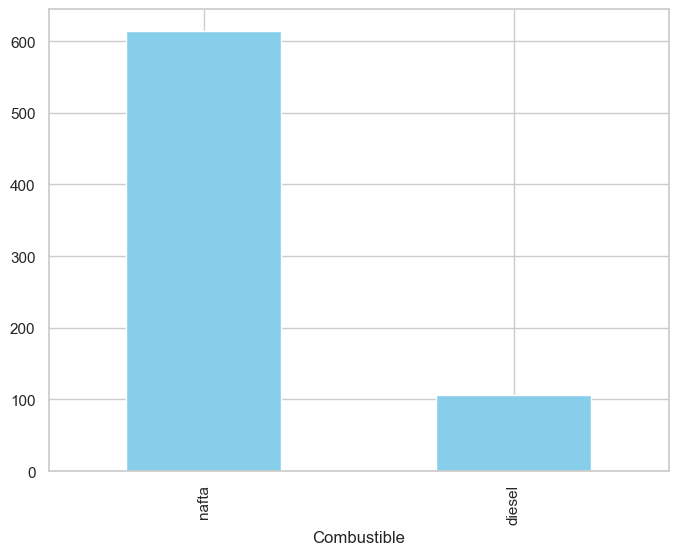

Alimentación


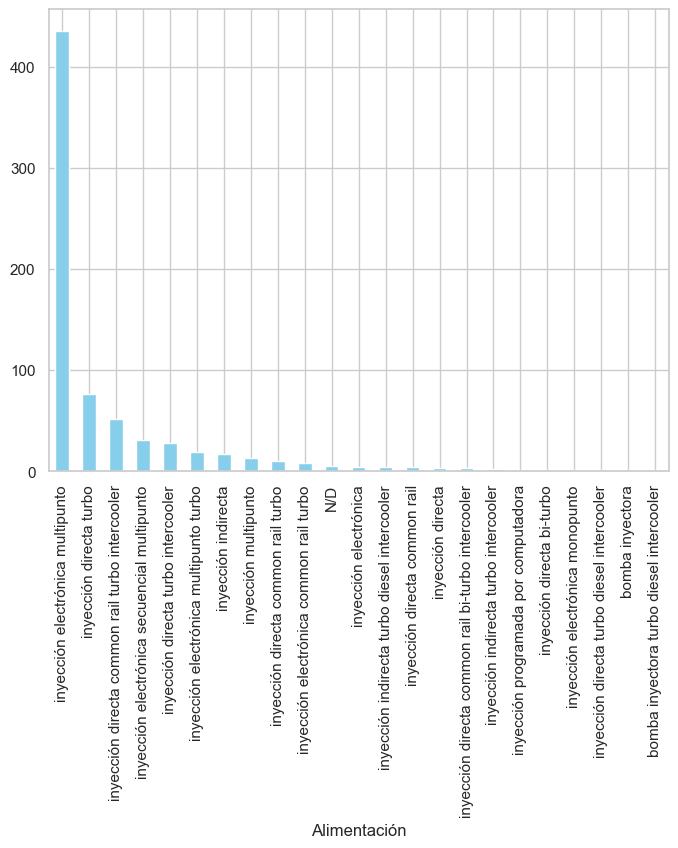

Válvulas


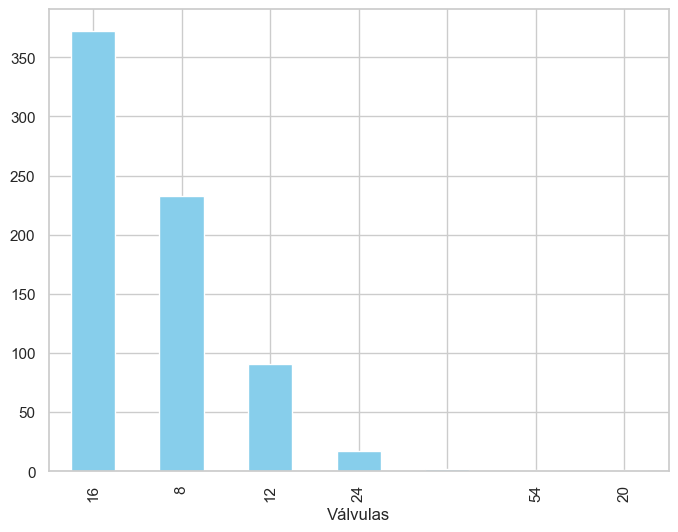

Sistema start/stop


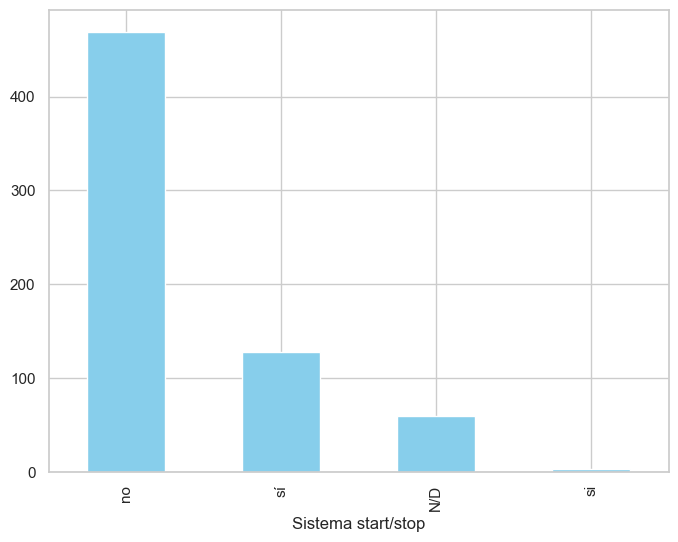

Motor-tracción


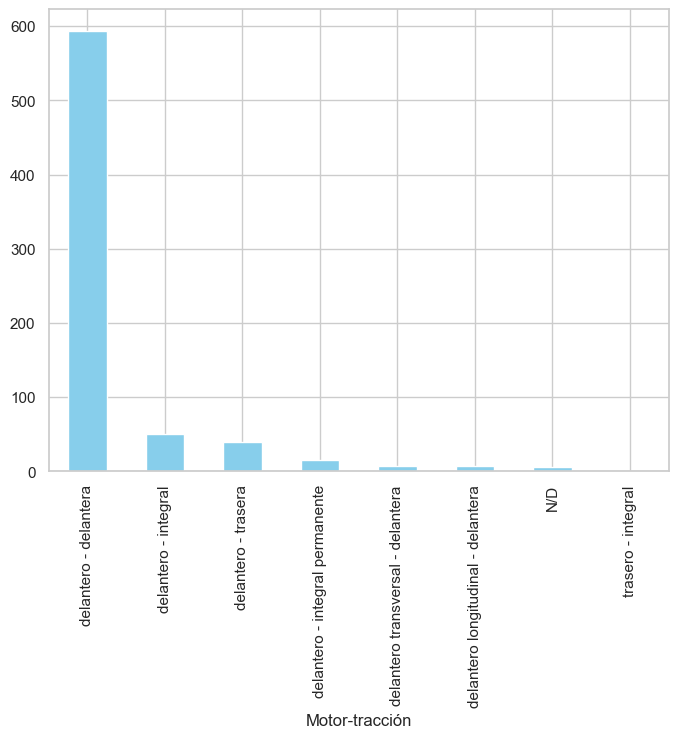

Transmisión


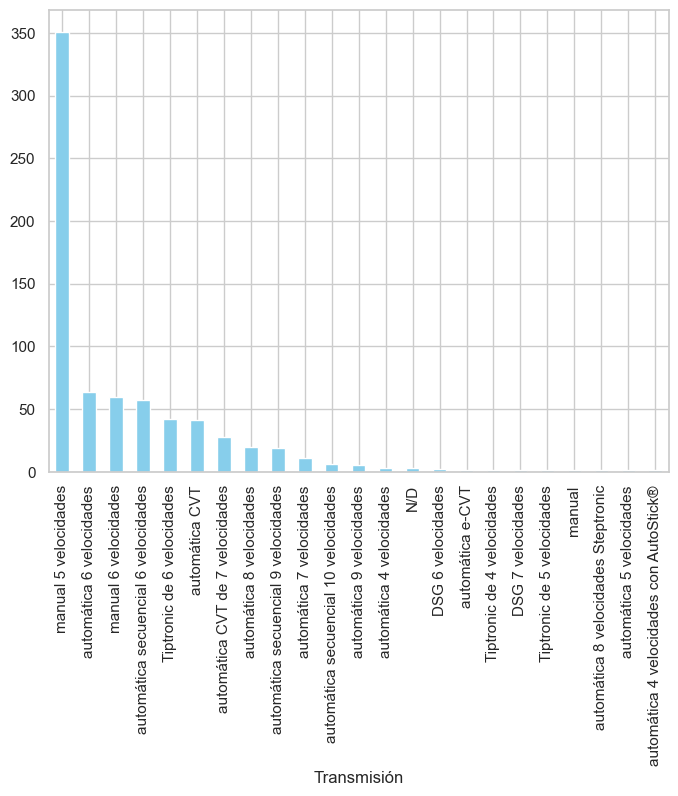

Neumáticos


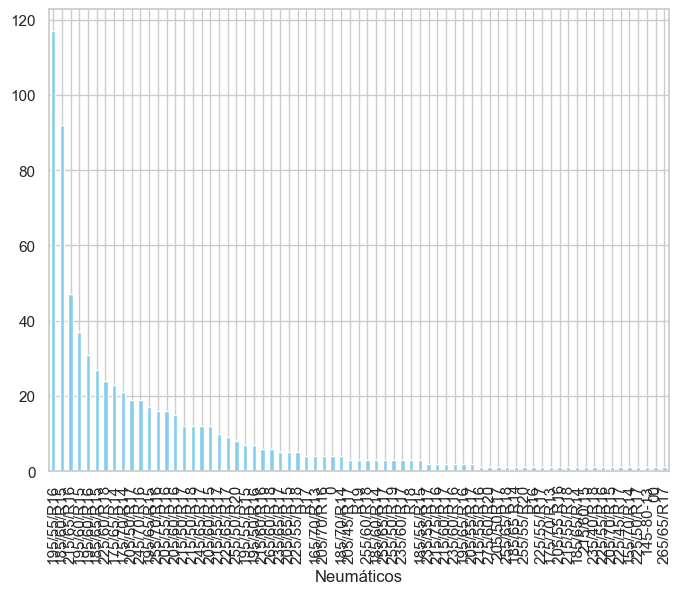

Frenos


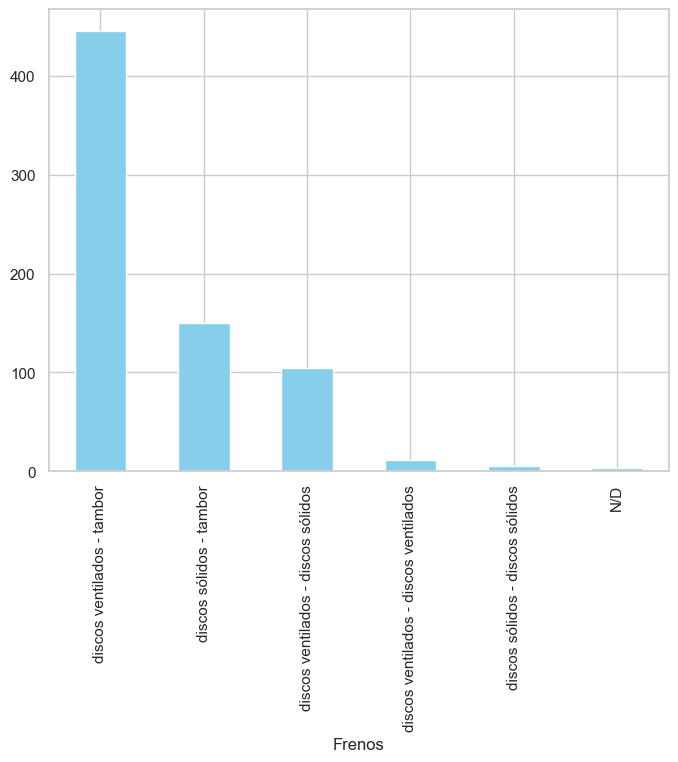

Suspensión delantera


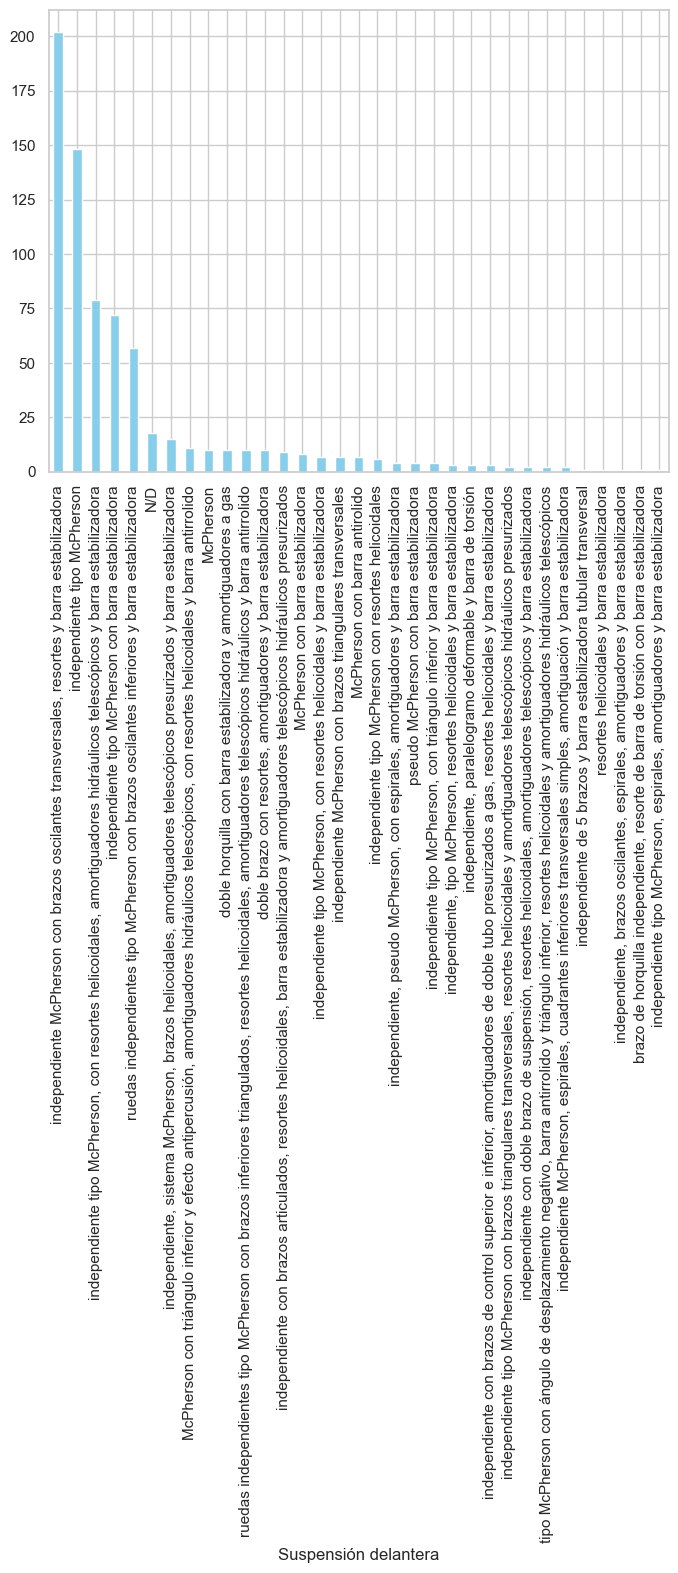

Suspensión trasera


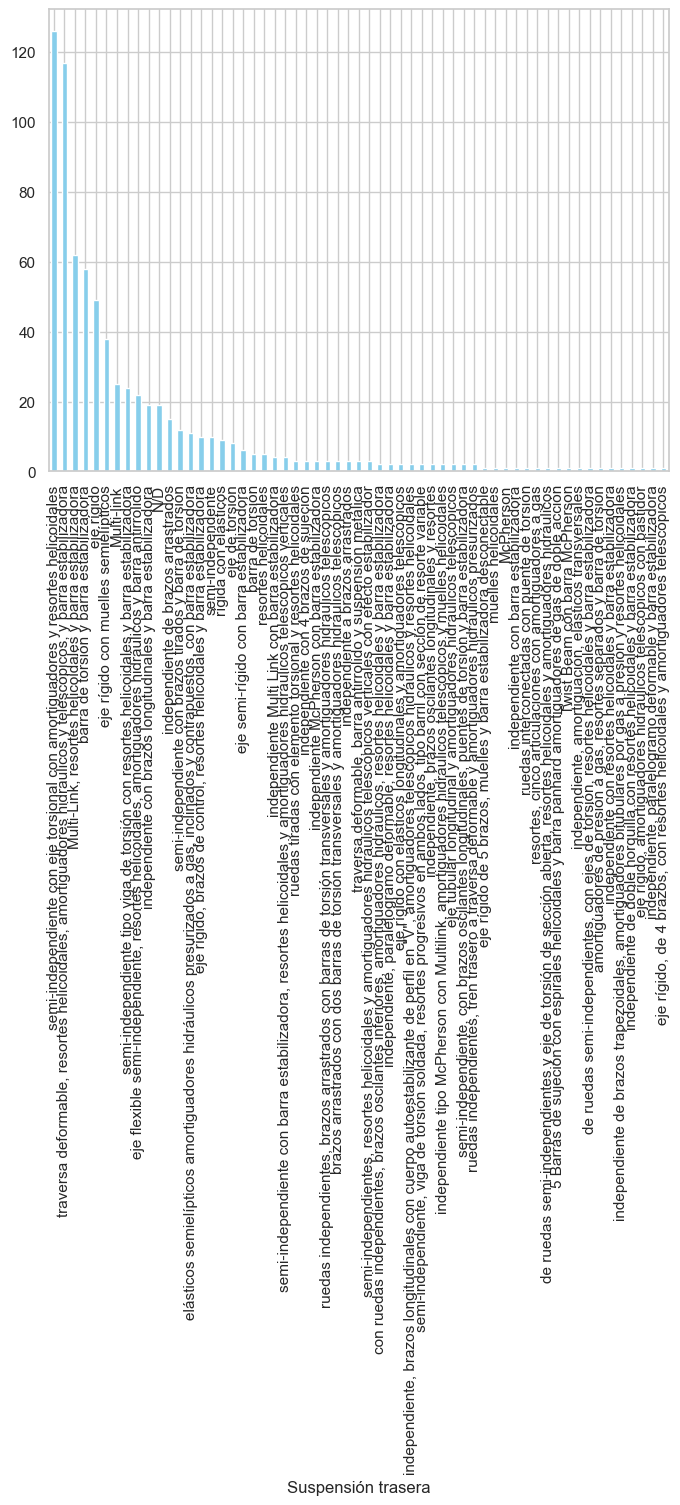

Remolque con frenos


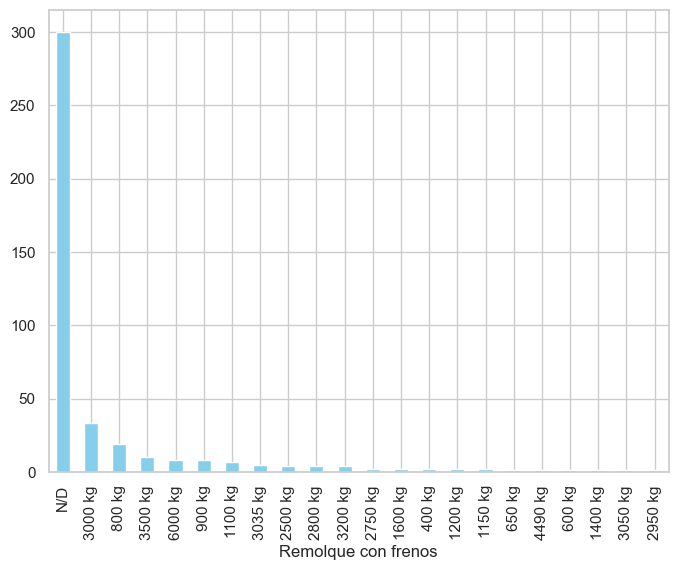

Dirección asistida


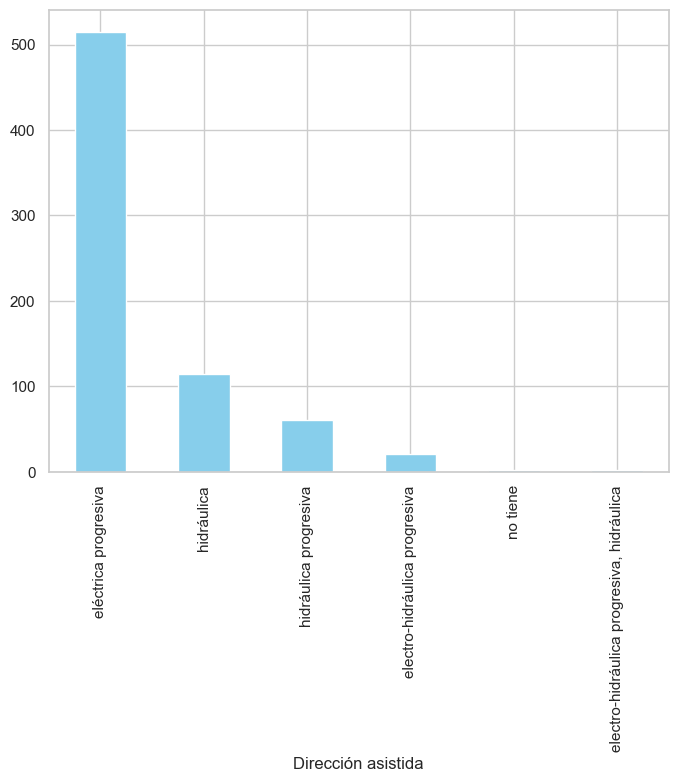

Llantas


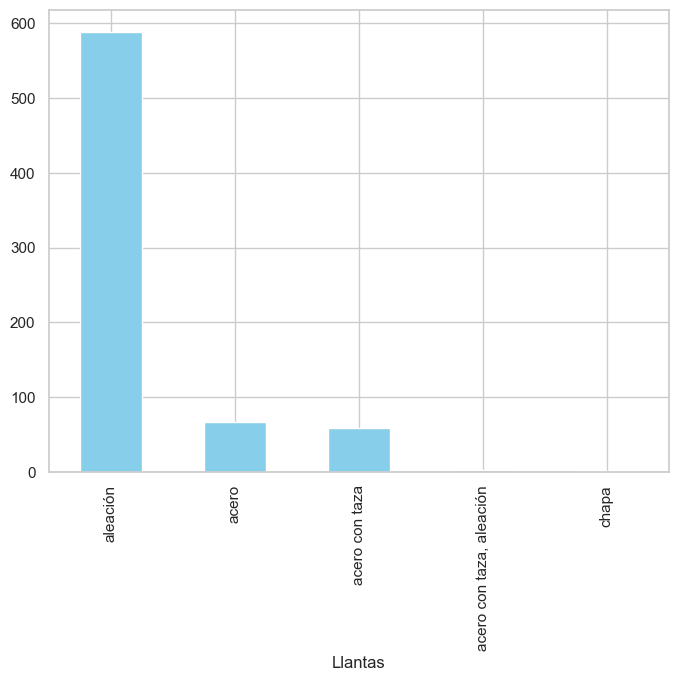

Autobloqueo de puertas con velocidad


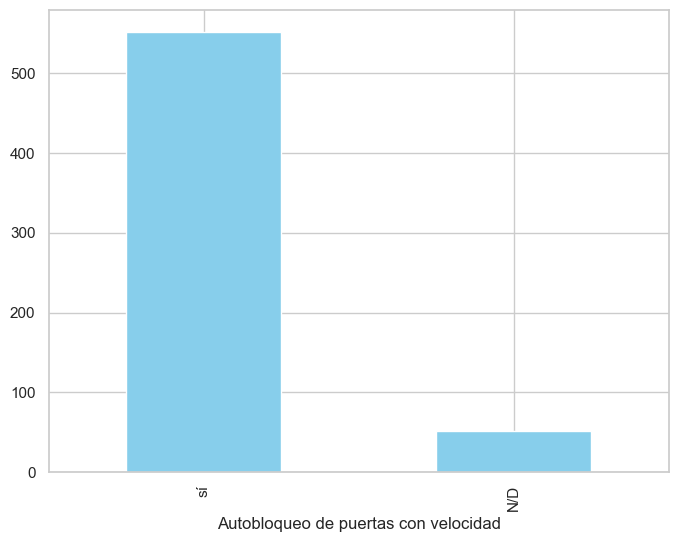

Control de estabilidad


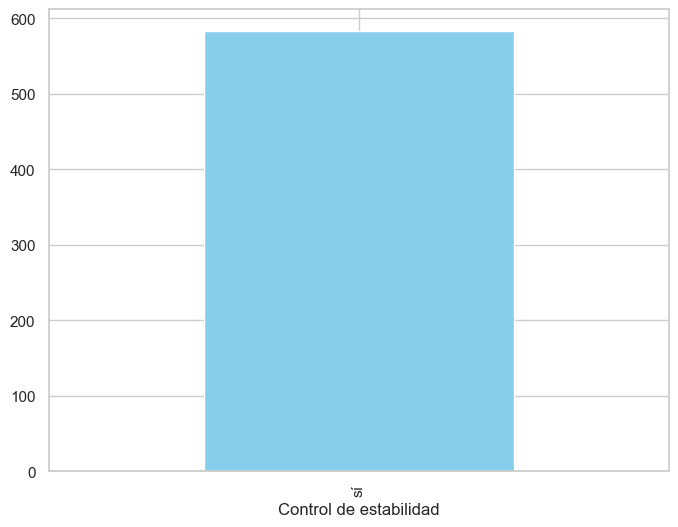

Control de tracción


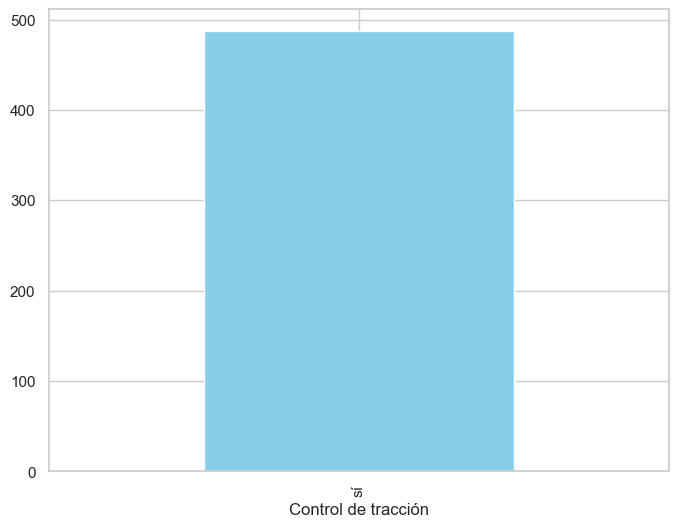

MirrorLink


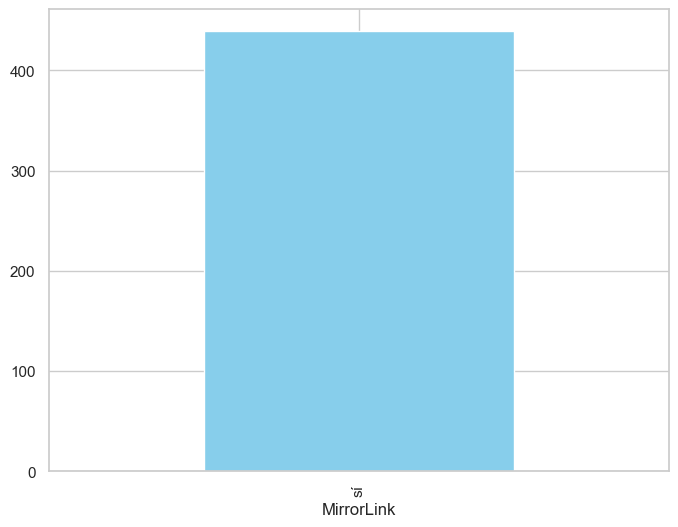

model


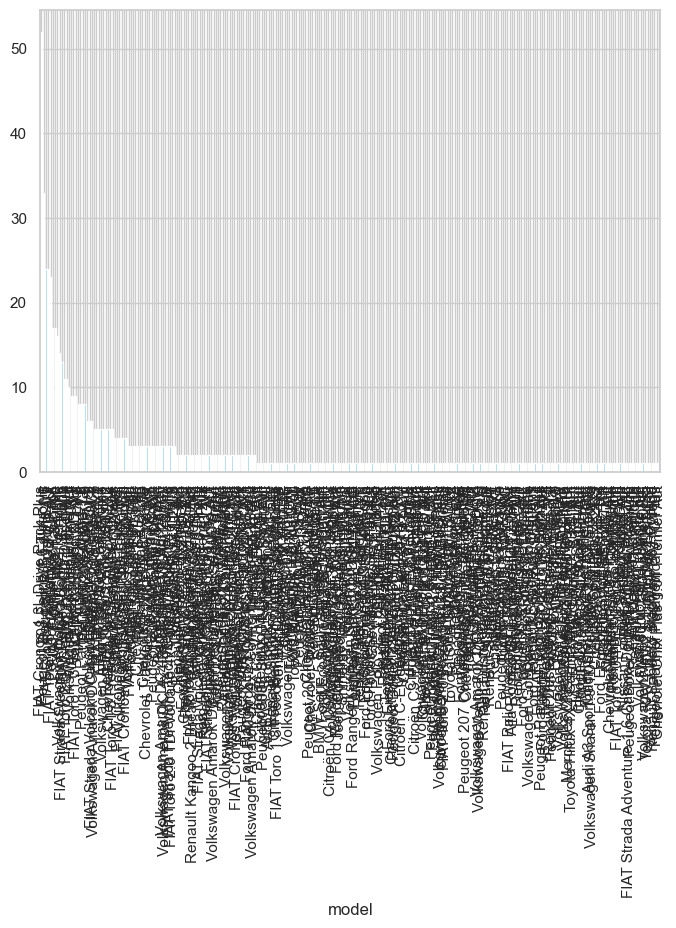

use_status


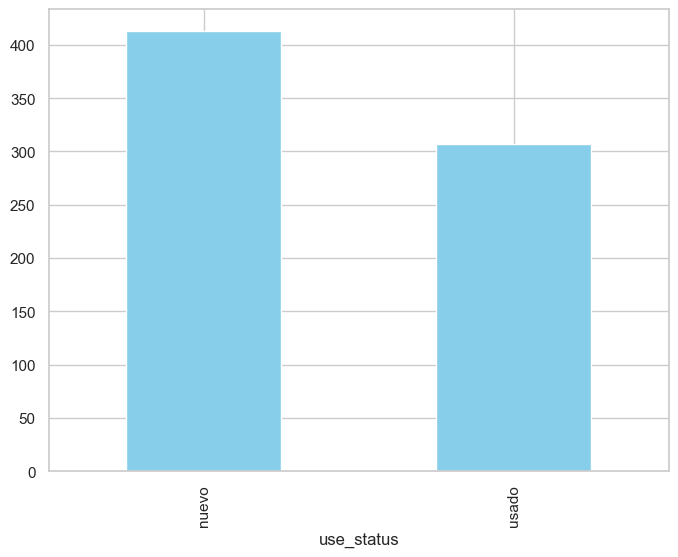

Limitador de velocidad


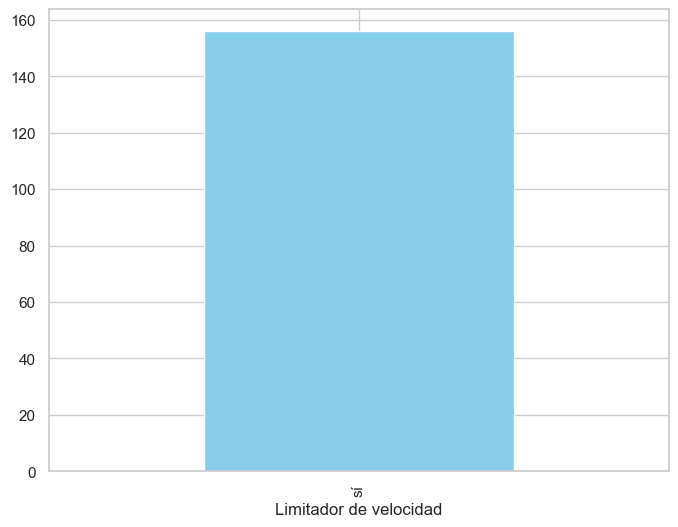

Capacidad de vadeo


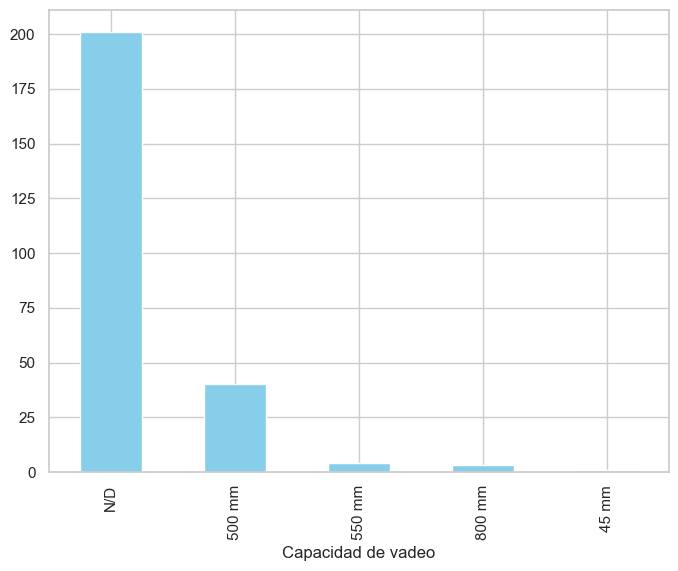

Control de velocidad crucero


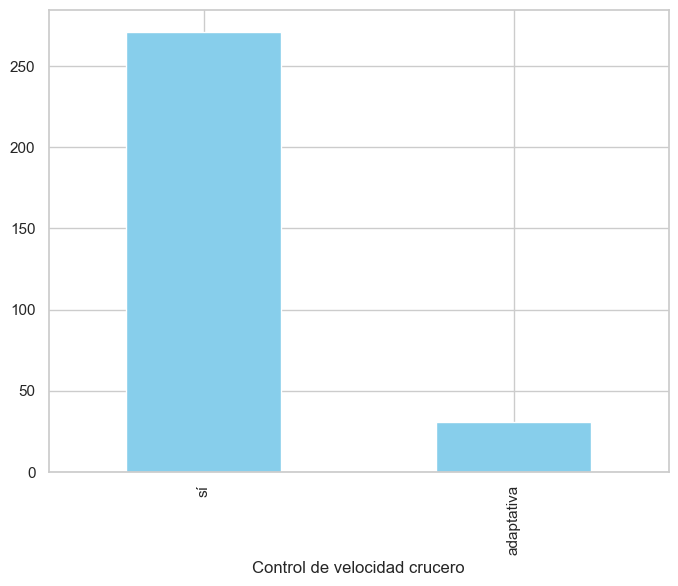

Palanca de cambios


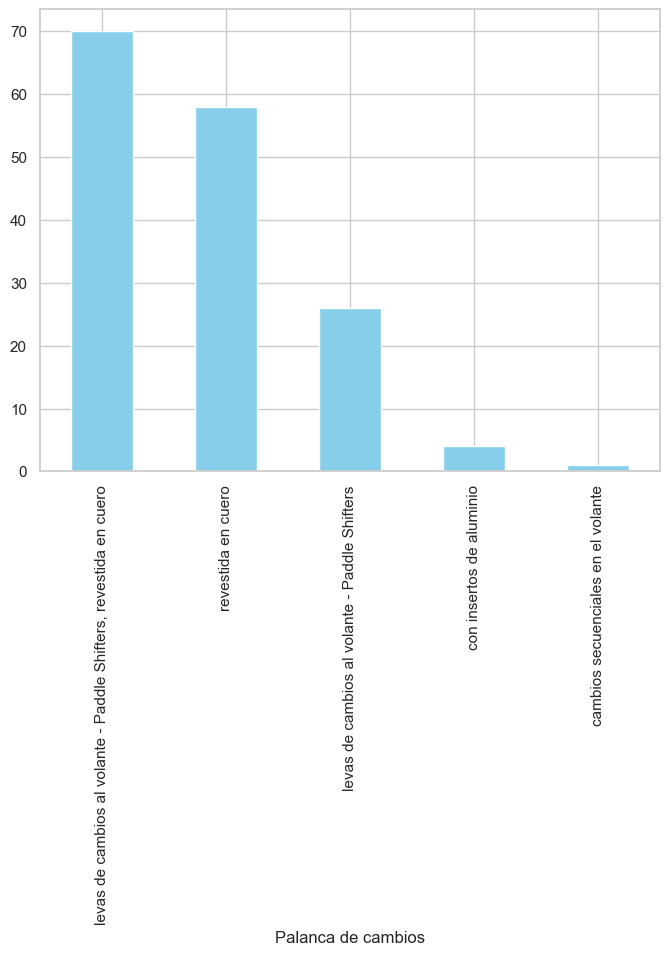

Encendido del motor


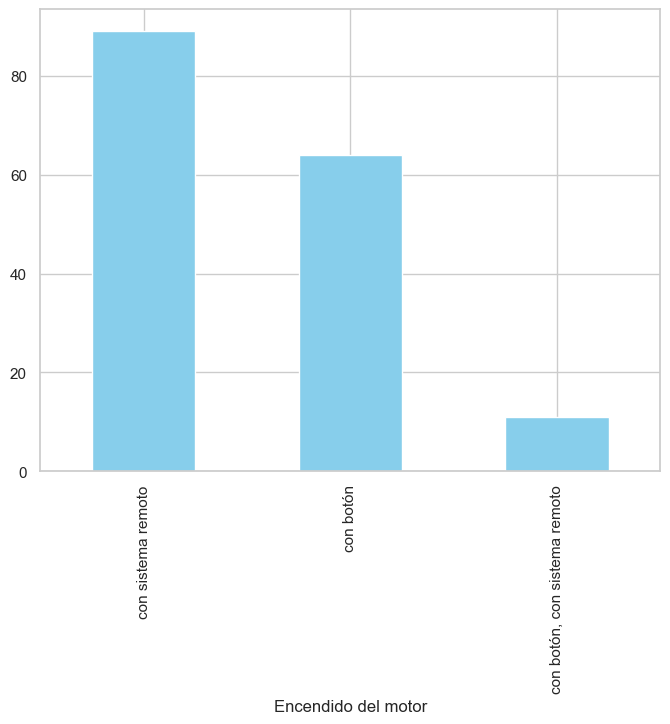

Potencia total sistema híbrido


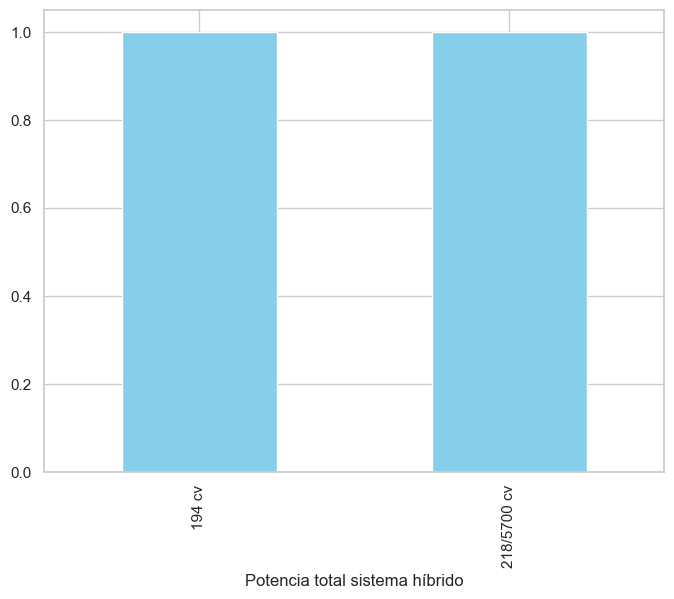

Torque total sistema híbrido


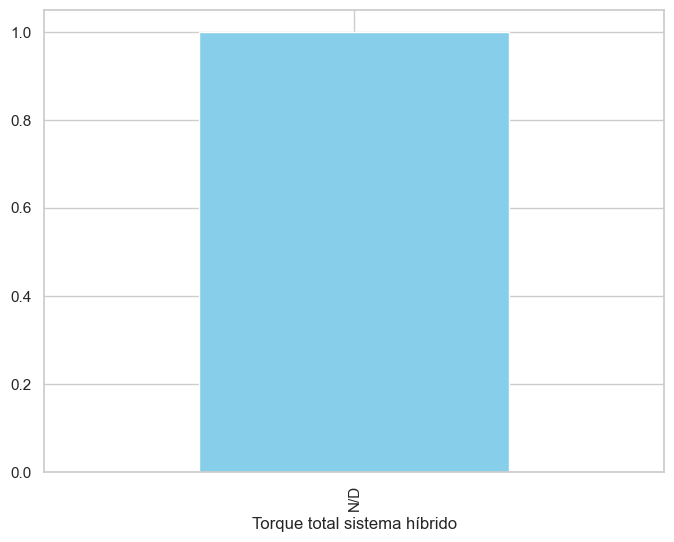

Tensión nominal


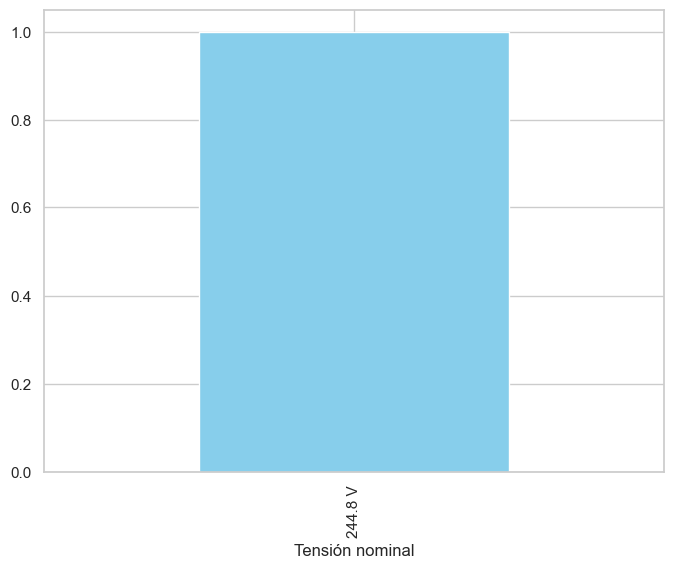

Tipo


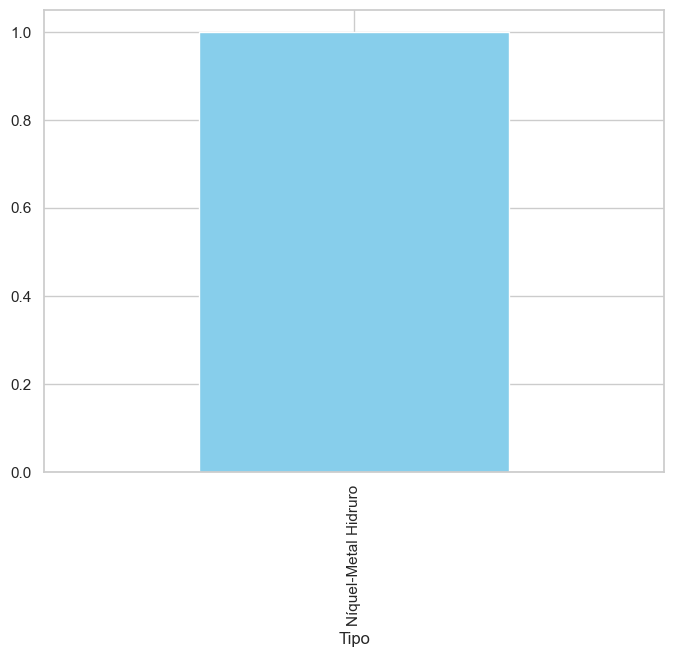

In [451]:
columns_to_plot_bar = df_cars_data.select_dtypes(include='object').columns
print(columns_to_plot_bar)

def create_plot(col_, kind):
    fig = plt.figure(figsize=(8,6))
    df_cars_data[col_].value_counts().plot(kind=kind, color='skyblue')
    plt.show()

for col in zip(columns_to_plot_bar):
    print(col[0])
    create_plot(col[0], 'bar')


In [452]:
def generate_histogram_boxplot(col_):
  col = f'{col_}'
  print(col_)
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  fig.tight_layout(pad=4.0)
  sns.set(style='whitegrid')
  sns.histplot(df_cars_data[col_], ax=axs[0], kde=True, bins=50, alpha=0.7)
  median_value = df_cars_data[col_].median()
  mean_value = df_cars_data[col_].mean()
  mode_value = df_cars_data[col_].mode().iloc[0]
  axs[0].axvline(median_value, color='r', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')
  axs[0].axvline(mean_value, color='g', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
  axs[0].axvline(mode_value, color='b', linestyle='dashed', linewidth=2, label=f'Moda: {mode_value:.2f}')
  axs[0].set_title(f'Histograma de {col_}')
  axs[0].legend()

  sns.boxplot(x=df_cars_data[col_], ax=axs[1])
  axs[1].set_title(f'Boxplot de {col_}')
  plt.show()

Potencia


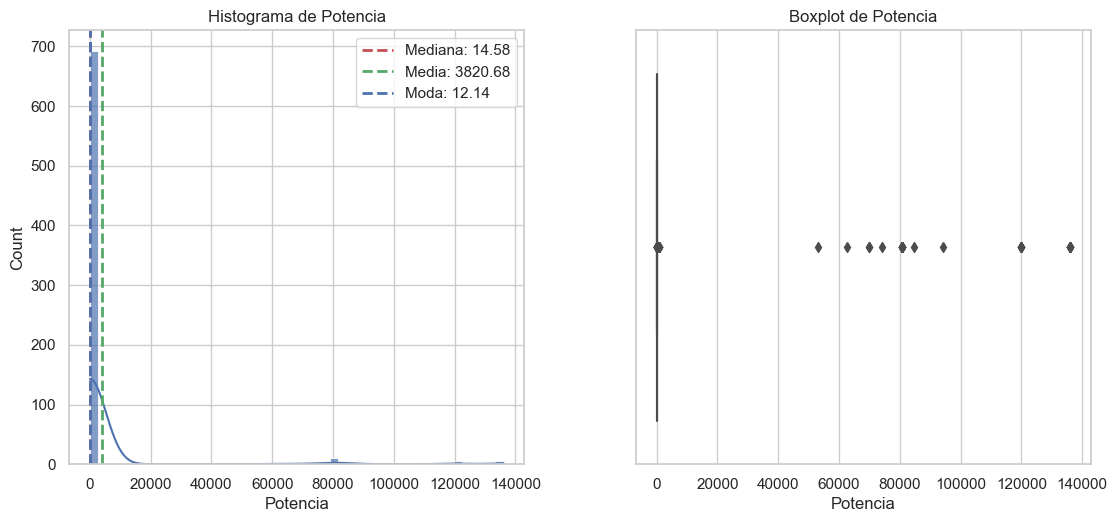

In [453]:
generate_histogram_boxplot('Potencia')

In [454]:
def filter_outliers(df, column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
  return df_filtered

In [455]:
for column in ['Potencia']:
    df_cars_data = filter_outliers(df_cars_data, column)

In [456]:
print(f'Now the dataset has {len(df_cars_data)} rows and {df_cars_data.shape[1]} columns')

Now the dataset has 645 rows and 51 columns


Potencia


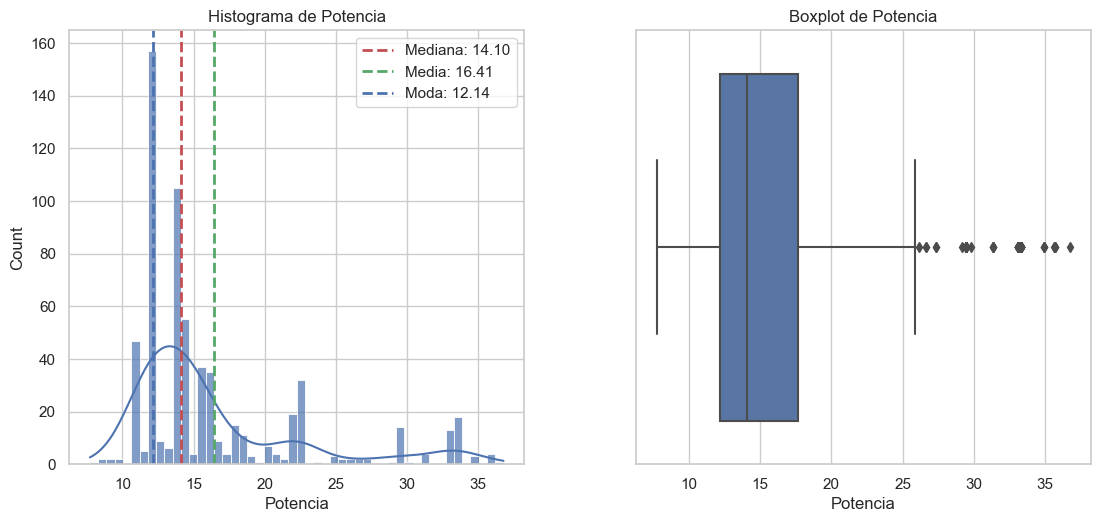

In [457]:
generate_histogram_boxplot('Potencia')

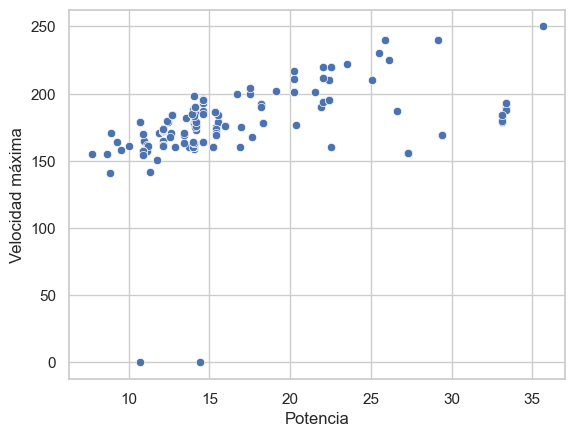

In [458]:
sns.scatterplot(data=df_cars_data, x='Potencia', y='Velocidad máxima')
plt.show()

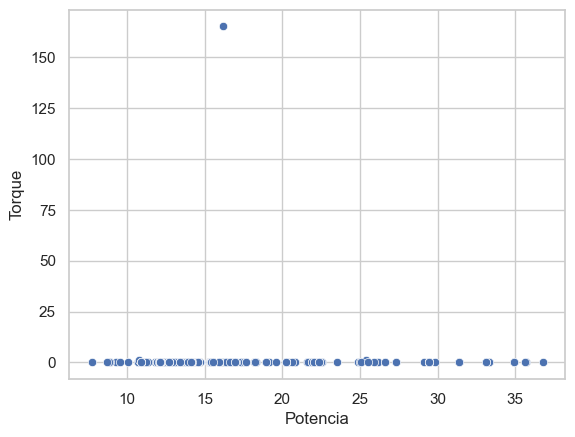

In [459]:
sns.scatterplot(data=df_cars_data, x='Potencia', y='Torque')
plt.show()

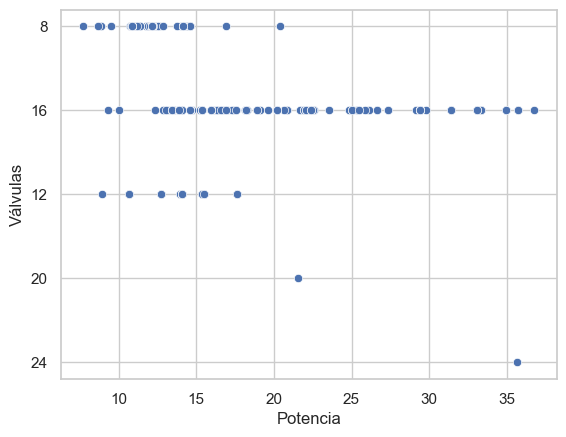

In [460]:
sns.scatterplot(data=df_cars_data, x='Potencia', y='Válvulas')
plt.show()

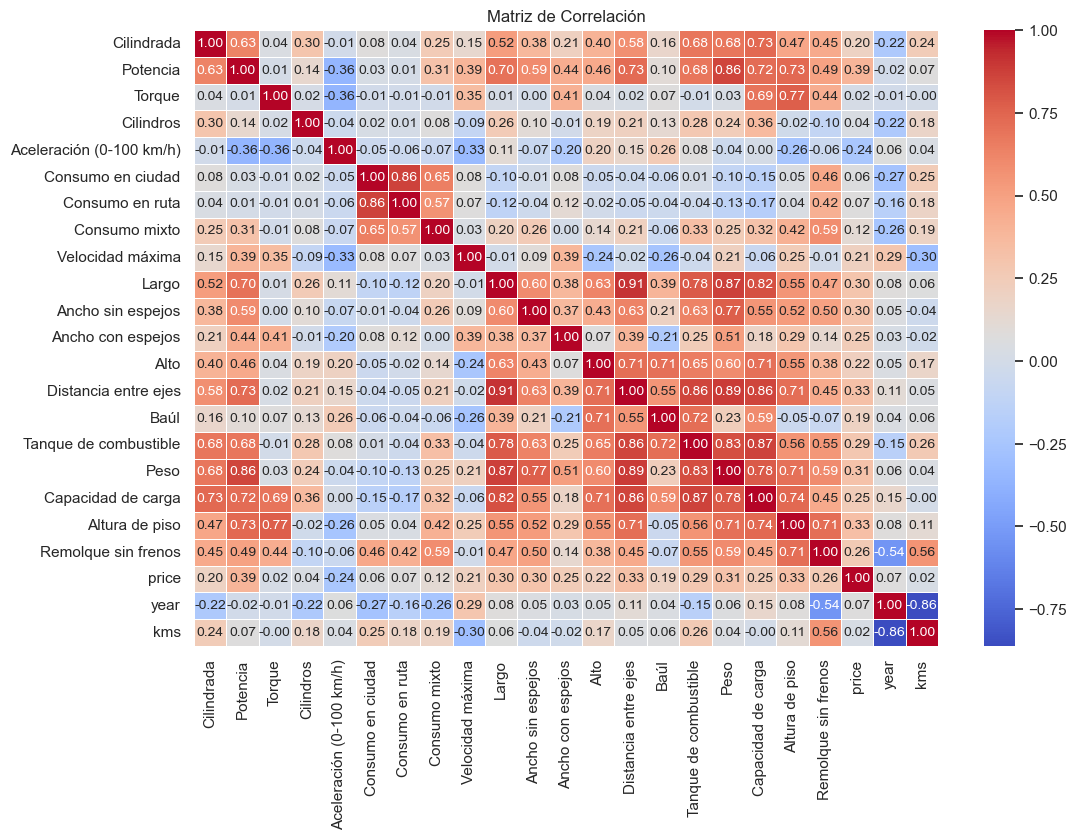

In [461]:
df_cars_data_matrix = df_cars_data.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_cars_data_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

In [462]:
df_cars_data.to_csv('./CSV/Cars_model_data_EDA.parquet')